In [8]:
#Imports
from flask import Flask, request
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
from PIL import Image
import base64


#Functions
def display_image(image,result,features):
    s=""
    for i, label in enumerate(features):
        pred = result[0][i]
        s += f"{label}: predicted {1 if pred > 0.4 else 0} ({format(pred, '.4f')})"
        s +="\n"
    plt.imshow(image)
    plt.title(s)
    plt.figure()
    return s

def load_model(attr2idx, loss, optimizer='adam', metrics=['accuracy']):
    resnet_features = ResNet50(include_top=False, input_shape=(112, 112, 3), pooling='avg')
    for layer in resnet_features.layers:
        layer.trainable = False
    model = Sequential([resnet_features,Dense(len(attr2idx)),Activation('sigmoid') ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)  
    model = keras.models.load_model(glob.glob('./model_20_epochs.h5')[0])
    return model

def get_attr_names(dataframe):
    attr_names = []
    attr_names = list(dataframe.columns)
    # removing images_id column
    del attr_names[0]
    return attr_names

def vector_prediction():
    #Paths & model
    FACE_WEIGHT_VGG16 = './vgg16.h5'
    MODEL_20_EPOCHS = './model_20_epochs.h5'

    #Variables
    features = ['5_o_Clock_Shadow','Arched_Eyebrows','Attractive','Bags_Under_Eyes','Bald','Bangs',
                'Big_Lips','Big_Nose','Black_Hair','Blond_Hair','Blurry','Brown_Hair','Bushy_Eyebrows',
                'Chubby','Double_Chin','Eyeglasses','Goatee','Gray_Hair','Heavy_Makeup','High_Cheekbones',
                'Male','Mouth_Slightly_Open','Mustache','Narrow_Eyes','No_Beard','Oval_Face','Pale_Skin',
                'Pointy_Nose','Receding_Hairline','Rosy_Cheeks','Sideburns','Smiling','Straight_Hair',
                'Wavy_Hair','Wearing_Earrings','Wearing_Hat','Wearing_Lipstick','Wearing_Necklace',
                'Wearing_Necktie','Young']
    attr2idx = {v:i for i, v in enumerate(features)}

    #Creating model
    optimizer = 'adam'
    bc_loss = 'binary_crossentropy'
    metrics = ['binary_accuracy']
    model = load_model(attr2idx, bc_loss, optimizer, metrics)
    
    # Decoding image
#     encodedImage = request.data
#     decoded_data = base64.b64decode((encodedImage))

    # Saving decoded data as image
#     img_file = open('./app/saved_image/decoded_image.jpg', 'wb')
#     img_file.write(decoded_data)
#     img_file.close()

    #Loading image
#     image = tf.io.read_file('./app/saved_image/decoded_image.jpg')
    image = tf.io.read_file('./rostom.jpg')
    image = tf.io.decode_jpeg(contents=image, channels=3)
    image = tf.cast(image, tf.float32)
    image = tf.divide(image, 255.)
    image = tf.image.resize(image, size=(112, 112))
    
    #Prediction
    new_image = image[None, :, :, :]
    result = model.predict(new_image)
    display_image(new_image[0],result,features)

    # Creating output vector
    threshold = 0.4
    prediction_vector = []
    for i, label in enumerate(features):
        pred = 1 if result[0][i] > threshold else 0
        prediction_vector.append((label, pred))
    for i in prediction_vectore: print(i)
        
        

1/1 [==============================] - 1s 1s/step


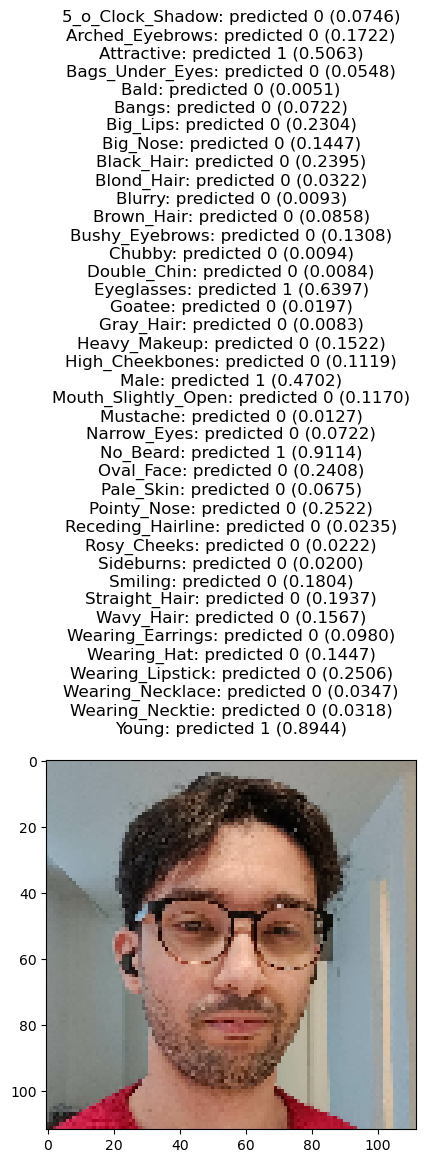

<Figure size 640x480 with 0 Axes>

In [6]:
vector_prediction()